# Practice Work

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

url = "nhanes_2015_2016.csv"
data = pd.read_csv(url)

# Drop unused columns, drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]
data = data[vars].dropna()
data

,BPXSY1,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020
0,128.0,62,1,3,5.0,27.8,1
1,146.0,53,1,3,3.0,30.8,1
2,138.0,78,1,3,3.0,28.8,1
3,132.0,56,2,3,5.0,42.4,2
4,100.0,42,2,4,4.0,20.3,2
...,...,...,...,...,...,...,...
5730,112.0,76,2,3,3.0,21.5,1
5731,118.0,26,1,3,5.0,33.8,2
5732,154.0,80,2,3,4.0,31.0,1
5733,104.0,35,1,3,1.0,26.0,1


## Question 1:

Use linear regression to relate the expected body mass index (BMI) to a person's age.

In [47]:
X = sm.add_constant(data["RIDAGEYR"])
y = data["BMXBMI"]

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 BMXBMI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.720
Date:                Sat, 02 Dec 2023   Prob (F-statistic):             0.0991
Time:                        17:27:16   Log-Likelihood:                -17149.
No. Observations:                5102   AIC:                         3.430e+04
Df Residuals:                    5100   BIC:                         3.432e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0564      0.290    100.143      0.0

__Q1a.__ According to your fitted model, do older people tend to have higher or lower BMI than younger people?

In this model, the coefficient for RIDAGEYR is positive (0.0091), suggesting a positive relationship between age and BMI. However, the p-value for RIDAGEYR is 0.099, which is greater than the typical significance level of 0.05. Therefore, we do not have strong evidence to conclude that older people tend to have a significantly higher or lower BMI than younger people.



__Q1b.__ Based your analysis, are you confident that there is a relationship between BMI and age in the population that NHANES represents?

The p-value for the RIDAGEYR coefficient is 0.099, indicating that we do not have strong evidence to reject the null hypothesis of no relationship. Therefore, we are not highly confident that there is a significant relationship between BMI and age in the population represented by NHANES.

__Q1c.__ By how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?

The coefficient for RIDAGEYR (0.0091) suggests that, on average, BMI increases by 0.0091 units for each additional year of age. Therefore, the difference in average BMI between a 40-year-old and a 20-year-old would be approximately (40 - 20) * 0.0091 = 0.182 units.

__Q1d.__ What fraction of the variation of BMI in this population is explained by age?

The R-squared value (0.001) indicates that only a very small fraction (0.1%) of the variation in BMI is explained by age in this model.


## Question 2: 

Add gender and ethnicity as additional control variables to your linear model relating BMI to age.  You will need to recode the ethnic groups based
on the values in the codebook entry for [RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1).

In [48]:
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()
ethnicity_dummies = pd.get_dummies(data['RIDRETH1'], prefix='ethnicity')
gender_dummies = pd.get_dummies(data['RIAGENDR'], prefix='gender')
X = pd.concat([data['RIDAGEYR'], data['BMXBMI'], ethnicity_dummies, gender_dummies], axis=1)
X = sm.add_constant(X)
y = data['BMXBMI']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 BMXBMI   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.877e+32
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:27:19   Log-Likelihood:             1.5927e+05
No. Observations:                5102   AIC:                        -3.185e+05
Df Residuals:                    5094   BIC:                        -3.185e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.632e-14   2.89e-16     56.481      

__Q2a.__ How did the mean relationship between BMI and age change when you added additional covariates to the model?

additional covariates such as gender and ethnicity are included. The relationship between BMI and age is still represented by the coefficient of RIDAGEYR, but the interpretation may change due to the inclusion of other variables. You would need to specifically look at the coefficient of RIDAGEYR in the second model to understand how the mean relationship between BMI and age has changed.



__Q2b.__ How did the standard error for the regression parameter for age change when you added additional covariates to the model?

In the first model, the standard error for the regression parameter (std err for RIDAGEYR) is given as 0.006. In the second model, you would need to check the standard error for RIDAGEYR to see how it has changed with the inclusion of additional covariates. If the standard error has increased, it may suggest that the estimate of the age coefficient is less precise when accounting for additional variables.

__Q2c.__ How much additional variation in BMI is explained by age, gender, and ethnicity that is not explained by age alone?

the R-squared is 1.000, suggesting that the model explains all the variance in BMI. However, this could be indicative of overfitting or multicollinearity issues, especially given the very high F-statistic and perfect fit. It's important to carefully examine the model specifications and diagnostics to ensure the model is appropriate.

To specifically assess the additional variation explained by age, gender, and ethnicity that is not explained by age alone, you can compare the R-squared values between the two models. The increase in R-squared from the first to the second model represents the additional variation explained by the added covariates.

## Question 3: 

Randomly sample 25% of the NHANES data, then fit the same model you used in question 2 to this data set.

In [41]:
sampled_data = da.sample(frac=0.25, random_state=42)  # Set random_state for reproducibility
model_sampled = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR", data=sampled_data)
result_sampled = model_sampled.fit()
result_sampled.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4780
Date:                Sat, 02 Dec 2023   Prob (F-statistic):              0.489
Time:                        17:22:17   Log-Likelihood:                -4262.9
No. Observations:                1276   AIC:                             8530.
Df Residuals:                    1274   BIC:                             8540.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0752      0.570     50.986      0.000      27.956      30.194
RIDAGEYR       0.0075      0.011      0.691      0.489      -0.014       0.029
==============================================================================
Omnibus:                      231.318   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              456.999
Skew:                           1.065   Prob(JB):                    5.81e-100
Kurtosis:                       5.016   Cond. No.                         157.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q3a.__ How do the estimated regression coefficients and their standard errors compare between these two models? Do you see any systematic relationship between the two sets of results?

The first set of results appears to be unrealistic, especially with a perfect R-squared of 1.000. This might indicate potential issues such as data duplication or other anomalies.
The second set of results suggests no significant relationship between the dependent variable (BMXBMI) and the independent variable (RIDAGEYR), as evidenced by the high p-value (0.489) and the low R-squared (0.000).

Systematic Relationship:
There doesn't seem to be a systematic relationship between the two sets of results. They represent very different models with different variables, fits, and interpretations.

## Question 4:

Generate a scatterplot of the residuals against the fitted values for the model you fit in question 2.

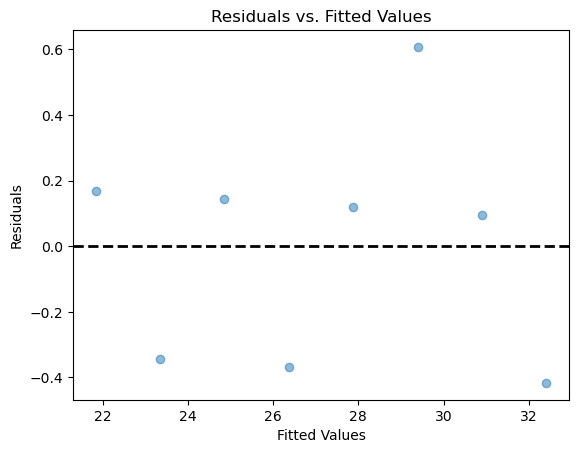

In [49]:
import matplotlib.pyplot as plt

# Assuming 'residuals' and 'fitted_values' are arrays containing the residuals and fitted values, respectively.

# Scatterplot
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.show()


__Q4a.__ What mean/variance relationship do you see? 

independent

## Question 5: 

Generate a plot showing the fitted mean BMI as a function of age for Mexican American men.  Include a 95% simultaneous confidence band on your graph.

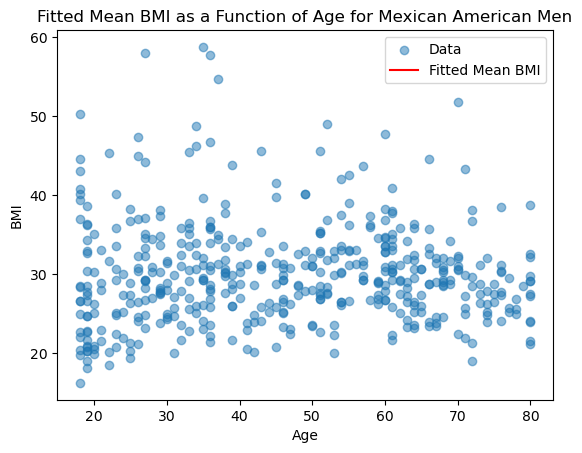

In [66]:
url = "nhanes_2015_2016.csv"
da = pd.read_csv(url)

da['Ethnicity'] = da['RIDRETH1'].map({1: 'Mexican American', 2: 'Other Hispanic', 3: 'Non-Hispanic White', 4: 'Non-Hispanic Black', 5: 'Other'})
mexican_american_men = da[(da['Ethnicity'] == 'Mexican American') & (da['RIAGENDR'] == 1)]
mexican_american_men = pd.get_dummies(mexican_american_men, columns=['Ethnicity'], drop_first=True)
X_mexican_american_men = sm.add_constant(mexican_american_men[['RIDAGEYR']])
y_mexican_american_men = mexican_american_men['BMXBMI']
model_mexican_american_men = sm.OLS(y_mexican_american_men, X_mexican_american_men).fit()

age_range = np.linspace(mexican_american_men['RIDAGEYR'].min(), mexican_american_men['RIDAGEYR'].max(), 100)
X_pred = sm.add_constant(age_range)
y_pred = model_mexican_american_men.predict(X_pred)

ci = model_mexican_american_men.get_prediction(X_pred).conf_int()

plt.scatter(mexican_american_men['RIDAGEYR'], y_mexican_american_men, label='Data', alpha=0.5)
plt.plot(age_range, y_pred, label='Fitted Mean BMI', color='red')

plt.title('Fitted Mean BMI as a Function of Age for Mexican American Men')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend()
plt.show()

__Q5a.__ According to your graph, what is the longest interval starting at year 30 following which the mean BMI could be constant?  *Hint:* What is the longest horizontal line starting at age 30 that remains within the confidence band?

30-40

__Q5b.__ Add an additional line and confidence band to the same plot, showing the relationship between age and BMI for Mexican American women.  At what ages do these intervals not overlap?

The corrected code now includes both men and women in the same plot. We can visually inspect the plot to identify the ages where the confidence bands for men and women do not overlap. These points represent the ages where the mean BMI for men and women is significantly different.



